In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
tjune = []
tjune = session.query(Measurement.date, Measurement.tobs).\
        filter(extract('month', Measurement.date) == 6)
#print(tjune.all())

In [5]:
#  3. Convert the June temperatures to a list.
tjune = session.query(Measurement.date, Measurement.tobs).\
        filter(extract('month', Measurement.date) == 6).all()
print(tjune)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(tjune, columns = ['date', 'June Temps'])
june_df.set_index(june_df['date'], inplace = True)
print(june_df.to_string(index = False))

      date  June Temps
2010-06-01        78.0
2010-06-02        76.0
2010-06-03        78.0
2010-06-04        76.0
2010-06-05        77.0
2010-06-06        78.0
2010-06-07        77.0
2010-06-08        78.0
2010-06-09        78.0
2010-06-10        79.0
2010-06-11        78.0
2010-06-12        78.0
2010-06-13        78.0
2010-06-14        77.0
2010-06-15        78.0
2010-06-16        78.0
2010-06-17        77.0
2010-06-18        77.0
2010-06-19        82.0
2010-06-20        78.0
2010-06-21        78.0
2010-06-22        78.0
2010-06-23        78.0
2010-06-24        78.0
2010-06-25        77.0
2010-06-26        76.0
2010-06-27        78.0
2010-06-28        78.0
2010-06-29        78.0
2010-06-30        78.0
2011-06-01        77.0
2011-06-02        78.0
2011-06-03        73.0
2011-06-04        70.0
2011-06-05        76.0
2011-06-06        77.0
2011-06-07        77.0
2011-06-08        77.0
2011-06-09        77.0
2011-06-10        78.0
2011-06-11        77.0
2011-06-12        77.0
2011-06-13 

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
tdec = []
tdec = session.query(Measurement.date, Measurement.tobs).\
        filter(extract('month', Measurement.date) == 12)
#print(tdec.all())

In [11]:
# 7. Convert the December temperatures to a list.
tdec = session.query(Measurement.date, Measurement.tobs).\
        filter(extract('month', Measurement.date) == 12).all()
print(tdec)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [12]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(tdec, columns = ['date', 'December Temps'])
dec_df.set_index(dec_df['date'], inplace = True)
print(dec_df.to_string(index = False))

      date  December Temps
2010-12-01            76.0
2010-12-03            74.0
2010-12-04            74.0
2010-12-06            64.0
2010-12-07            64.0
2010-12-08            67.0
2010-12-09            77.0
2010-12-10            66.0
2010-12-11            69.0
2010-12-12            68.0
2010-12-13            68.0
2010-12-14            71.0
2010-12-15            74.0
2010-12-16            67.0
2010-12-17            66.0
2010-12-18            69.0
2010-12-19            71.0
2010-12-23            70.0
2010-12-24            70.0
2010-12-26            74.0
2010-12-27            74.0
2010-12-28            71.0
2010-12-29            75.0
2010-12-30            75.0
2010-12-31            72.0
2011-12-01            69.0
2011-12-02            68.0
2011-12-03            73.0
2011-12-04            74.0
2011-12-05            73.0
2011-12-06            73.0
2011-12-07            73.0
2011-12-08            73.0
2011-12-09            71.0
2011-12-10            73.0
2011-12-11            73.0
2

In [13]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Additional analysis

In [25]:
# Retrieve precipitation scores for June and December
# June

pjune = []
pjune = session.query(Measurement.date, Measurement.prcp).\
        filter(extract('month', Measurement.date) == 6).all()
pjune_df = pd.DataFrame(pjune, columns = ['date', 'June Precipitation'])
pjune_df.set_index(pjune_df['date'], inplace = True)
pjune_df = pjune_df.sort_index()
print(pjune_df.to_string(index = False))

      date  June Precipitation
2010-06-01                0.00
2010-06-01                0.01
2010-06-01                0.00
2010-06-01                 NaN
2010-06-01                0.03
2010-06-01                0.00
2010-06-01                0.00
2010-06-01                0.08
2010-06-01                0.03
2010-06-02                0.00
2010-06-02                0.03
2010-06-02                0.00
2010-06-02                0.00
2010-06-02                0.03
2010-06-02                0.00
2010-06-02                0.00
2010-06-02                0.00
2010-06-02                0.01
2010-06-03                0.00
2010-06-03                0.00
2010-06-03                0.10
2010-06-03                0.00
2010-06-03                0.14
2010-06-03                0.00
2010-06-03                0.00
2010-06-03                0.00
2010-06-03                0.00
2010-06-04                0.00
2010-06-04                0.00
2010-06-04                0.00
2010-06-04                0.00
2010-06-

In [41]:
# December
pdec = []
pdec = session.query(Measurement.date, Measurement.prcp).\
        filter(extract('month', Measurement.date) == 12).all()
pdec_df = pd.DataFrame(pdec, columns = ['date', 'December Precipitation'])
pdec_df.set_index(pdec_df['date'], inplace = True)
pdec_df = pdec_df.sort_index()
print(pdec_df.to_string(index = False))

      date  December Precipitation
2010-12-01                    0.04
2010-12-01                    0.03
2010-12-01                    0.70
2010-12-01                    0.03
2010-12-01                    1.35
2010-12-01                    0.13
2010-12-01                    1.48
2010-12-01                    0.76
2010-12-02                     NaN
2010-12-02                    0.16
2010-12-02                    0.06
2010-12-02                    0.26
2010-12-02                    0.00
2010-12-02                    0.13
2010-12-02                    0.02
2010-12-02                    0.18
2010-12-03                    1.59
2010-12-03                    0.01
2010-12-03                    0.78
2010-12-03                    0.00
2010-12-03                    0.22
2010-12-03                    0.01
2010-12-03                    0.47
2010-12-03                    0.16
2010-12-04                    0.00
2010-12-04                    0.00
2010-12-04                    0.19
2010-12-04          

<AxesSubplot:title={'center':'June Precipitation by date'}, xlabel='date'>

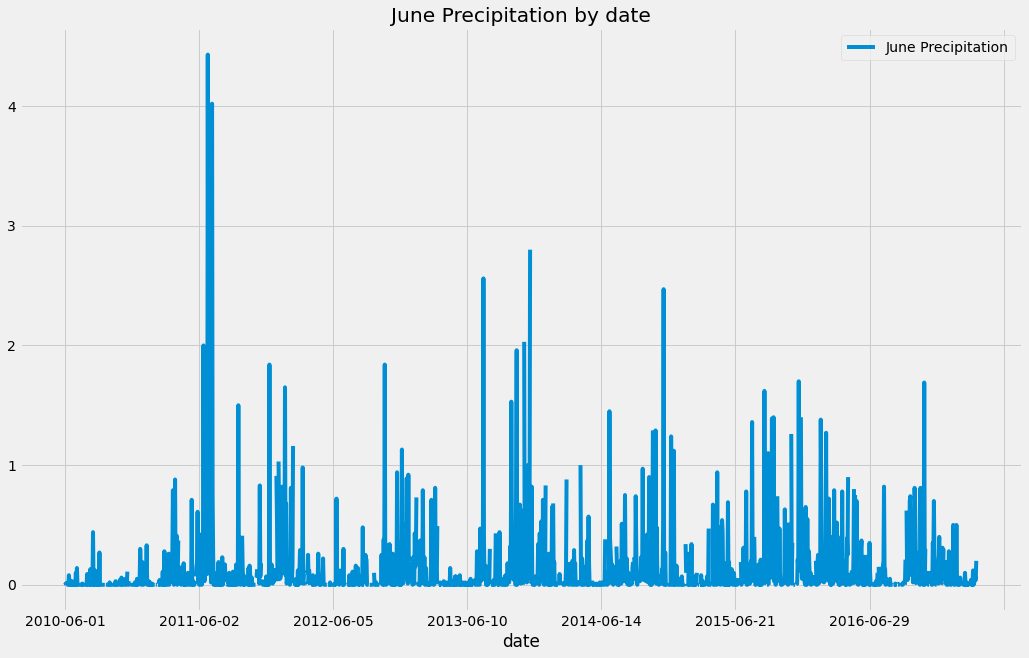

In [46]:
pjune_df.plot(title = 'June Precipitation by date', figsize = (16, 10))

<AxesSubplot:title={'center':'December Precipitation by date'}, xlabel='date'>

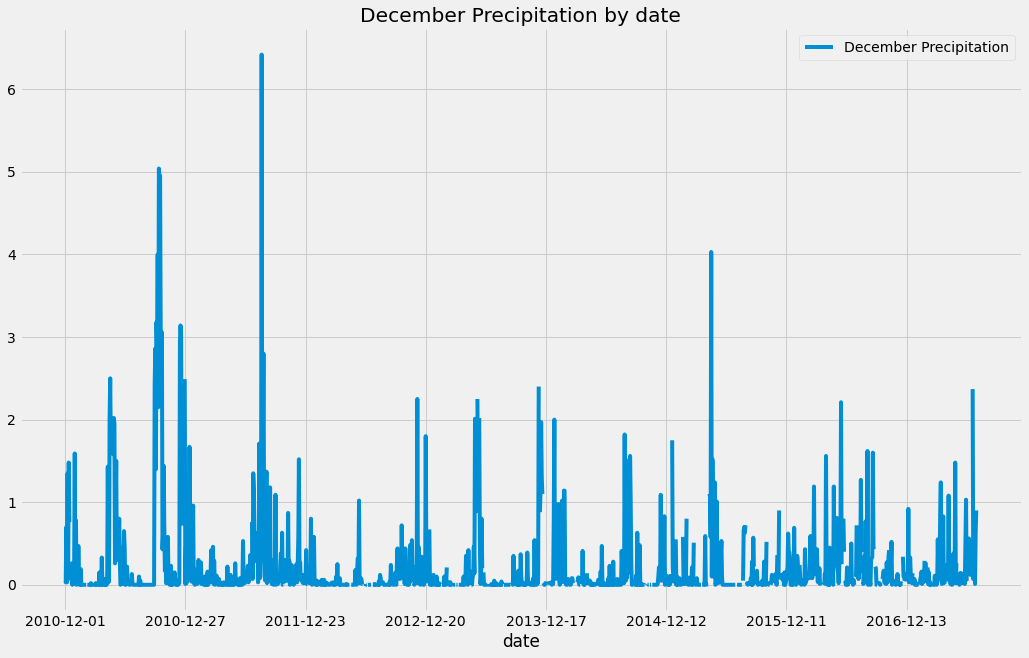

In [45]:
pdec_df.plot(title = 'December Precipitation by date', figsize = (16,10))

In [49]:
pjune_summary_df = pjune_df.describe()
pdec_summary_df = pdec_df.describe()

In [50]:
precip_df = pd.merge(pjune_summary_df, pdec_summary_df, left_index = True, right_index = True)
precip_df

,June Precipitation,December Precipitation
count,1574.000000,1405.000000
mean,0.136360,0.216819
std,0.335731,0.541399
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.020000,0.030000
75%,0.120000,0.150000
max,4.430000,6.420000
